-----------
$$
\vec{F}/\mu = \ddot{\vec{r}} = -k {\vec{r}\over r^3}, \qquad k = G M / f^3
$$

$$
L/\mu = h = r v_{\theta} = r^2 \dot\theta, \qquad E/\mu = \epsilon = \frac{1}{2}v^2-\frac{k}{r}= \frac{1}{2}\left(v_r^2+v_{\theta}^2\right)-\frac{k}{r} = \frac{1}{2}\dot{r}^2+\frac{h^2}{2 r^2}-\frac{k}{r}
$$

$$
r = \frac{h^2/k}{1+\sqrt{1+2\epsilon h^2/k^2} \cos\theta}, \qquad r = \frac{A}{1+e\cos\theta} 
$$

$$
v_{\theta} = \frac{k}{h}(1+e\cos\theta), \qquad v_{r} = \frac{k}{h} e \sin\theta
$$

$$
\theta = \phi - \phi_{\text{major axis}}, \qquad \phi_{\text{major axis}} = \phi_{0\left(\text{Using Initial Positions}\right)} - \theta_{0\left(\text{Using Initial Velocties}\right)}
$$

In [21]:
####### LIBRARIES #######
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import physical_constants as phycon

from numpy.linalg import norm
from numpy import sqrt,array,arcsin,cos,sin,pi,arange,linspace,zeros,arctan2

# from matplotlib import cm
# from mycolorpy import colorlist as mcp
# clr=mcp.gen_color(cmap='Blues',n=10)[5:8]

G = phycon['Newtonian constant of gravitation'][0]

def set_plot(plt,ax):
    plt.style.use(('seaborn-v0_8-pastel'))
    ax.tick_params(which='both', direction='in',right=True,top=True)   
    ax.minorticks_on()
    ax.axis('equal')
    ax.grid(which='minor',lw=0.25,alpha=0.5)
    ax.grid(which='major',lw=1,alpha=0.5)

arrow1 = {'head_width':0.01,'head_length':0.05}


In [43]:
####### INITIAL CONDITIONS #######

## three elliptic paths
v = array([[1,-1],[-1,1],[1,1]])
m = array([1,1,10])/G
x = array([[0,0],[1,0]])

## three elliptic paths
# v = array([[0,1],[1,0],[1,-1]])
# m = array([1,1,1])/G
# x = array([[0,0],[1,0]])

## three elliptic paths
# v = array([[0,1],[1,0],[1,1]])
# m = array([1,1,1])/G
# x = array([[0,0],[1,0]])


In [44]:
####### COMPUTING ORBITS #######
M = m.sum()
vc = np.sum([m[i]*v[i] for i in range(3)]/M,axis=0)
v = (v-vc)
vnorm = norm(v,axis=1)

s2 = x[1]-x[0]
p = norm(s2)
phi = arcsin(s2[1]/p)
x2 = array([x[0,0]+p*np.cos(phi+np.pi/3),x[0,1]+p*np.sin(phi+np.pi/3)]).reshape(1,-1)
x = np.vstack((x,x2))
xc = np.sum([m[i]*x[i] for i in range(3)]/M,axis=0)
x = x-xc.reshape(1,-1)
xnorm = norm(x,axis=1)
xhat = x/xnorm.reshape(-1,1)

f = p/xnorm
k = G*M/(f**3)

vr = array([ (v[i]@xhat[i])*xhat[i] for i in range(3)])
vt = v - vr
vrnorm = norm(vr,axis=1)
vtnorm = norm(vt,axis=1)

vrsgn = np.sign([np.dot(x[i],v[i]) for i in range(3)])
vtsgn = np.sign([np.cross(x[i],vt[i]) for i in range(3)])

h = xnorm*vtnorm
eps = 0.5*vnorm**2 - k/xnorm
e = sqrt(1+2*eps*h**2/k**2)


In [45]:
####### TRANSFORM TO ORIGINAL FRAME #######
phi0 = arctan2(x[:,1],x[:,0])
phi0[phi0<0] += 2*pi

th0 = arctan2(vrnorm*h/k,vtnorm*h/k-1)
th0[th0<0] += 2*pi

phim = phi0-vrsgn*vtsgn*th0
phim[phim<0] += 2*pi

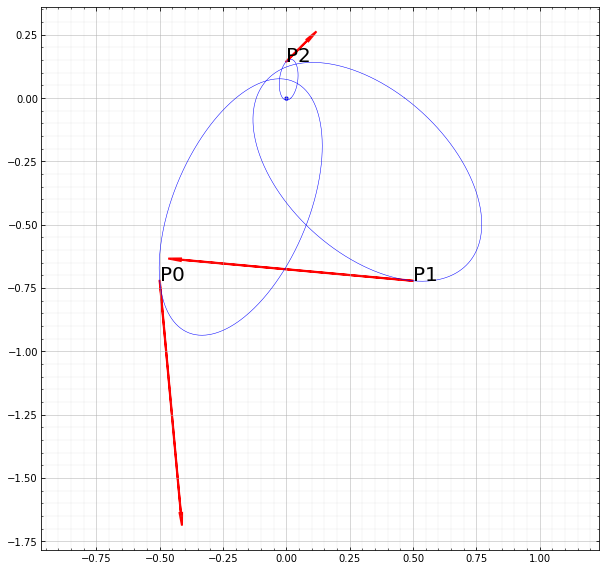

In [46]:
####### PLOT #######
org = array([0,0])
r = zeros((3,1000))
phi = linspace(0,2*pi,1000)

for i in range(3):
    r[i] = h[i]**2/k[i]/(1+e[i]*cos(phi-phim[i]))

fix,ax = plt.subplots(1,1,figsize=(10,10))
set_plot(plt,ax)
ax.scatter(*org,s=10,c='b')
for i in range(3):
    ax.arrow(*x[i],*v[i]/2,**arrow1,color='r',lw=2)
    ax.plot(r[i]*cos(phi),r[i]*sin(phi),c='b',lw=0.5)
    ax.text(*x[i],f"P{i}",fontsize=20)

# ax.axis([-10.,10., -50., 50.])
plt.show()
